### チュートリアルを元に前処理をしっかりやる

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
import datetime

In [5]:
import MeCab

In [6]:
tagger = MeCab.Tagger('-Owakati')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
le = LabelEncoder()

In [229]:
train = pd.read_csv("./competition/train.csv")
test = pd.read_csv("./competition/test.csv")

# データの前処理
train['train'] = 1
test['train'] = 0
data = pd.concat([train,test])
data['dateid'] = pd.to_datetime(data['dateid'])
data = data.set_index('dateid')

data['event'] = data['event'].fillna('なし')

data['payday'] = data['payday'].fillna(0)

## 特記事項が欠損している場合は'なし'とする
data['remarks'] = data['remarks'].fillna('なし')

## 天気を3種類に
data.loc[~((data['weather'] == '晴')|(data['weather'] == '快晴')|(data['weather'] == '曇')) , 'weather'] = 'その他'

data.loc[~((data.remarks == 'お楽しみメニュー')|(data.remarks == 'なし')),'remarks']= 'その他'

select_cols = ['week', 'remarks', 'event', 'payday', 'weather', 'train', 'y']



data = pd.get_dummies(data[select_cols])

## 'train' の項目が0をtestデータとする
train = data[data['train']==1]
test = data[data['train']==0]

train = train.drop(columns=['train'])
test = test.drop(columns=['train'])

# 学習データと評価用データに分割(訓練用データのみ)
tr = train[train.index < datetime.datetime(2015,4,1)]
val = train[train.index >= datetime.datetime(2015,4,1)]

tr_X = tr.drop(columns=['y'])
tr_y = tr['y']
val_X = val.drop(columns=['y'])
val_y = val['y']

# 学習&予測
model = RandomForestRegressor(random_state=42)
model.fit(tr_X, tr_y)
tr_pred = model.predict(tr_X)
val_pred = model.predict(val_X)

# RMSEの算出
print("TRAIN:",MSE(tr_y, tr_pred)**0.5, "VARIDATE",MSE(val_y, val_pred)**0.5)

TRAIN: 15.266174277341777 VARIDATE 11.005794202388952


In [120]:
train = pd.read_csv("./competition/train.csv")
test = pd.read_csv("./competition/test.csv")

# データの前処理
train['train'] = 1
test['train'] = 0
data = pd.concat([train,test])
data['dateid'] = pd.to_datetime(data['dateid'])
data

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,train
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9,1
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2,1
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8,1
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3,1
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2016-05-19,NaN,Thu,1,豚肉ザーサイ豆腐,490.0,NaN,NaN,NaN,晴後薄曇,0.0,19.3,0
140,2016-05-20,NaN,Fri,1,キーマカレー,485.0,NaN,ママの会,NaN,曇,0.0,17.2,0
141,2016-05-23,NaN,Mon,0,鶏肉の照り焼き,505.0,NaN,NaN,NaN,薄曇後時々晴,0.0,23.5,0
142,2016-05-24,NaN,Tue,1,海鮮チリソース,485.0,NaN,NaN,NaN,薄曇一時晴,0.0,23.4,0


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
features = tv.fit_transform(data['name'])
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components=50, random_state=42)

features_svd = svd.fit_transform(features)
features_svd.shape

(481, 50)

In [122]:
features_svd

array([[ 1.54761968e-08, -2.33044764e-09,  9.88929655e-01, ...,
        -5.34057640e-06,  2.79061845e-05, -4.94697179e-06],
       [-2.86267780e-08, -6.22977301e-08, -4.54569479e-08, ...,
         1.31073430e-06,  3.54796163e-06,  3.76027355e-06],
       [-2.09971992e-09, -8.37090995e-09,  9.04430011e-09, ...,
        -5.00655327e-09, -1.37898992e-07, -1.05419860e-07],
       ...,
       [-6.35972973e-07, -1.11012702e-06,  1.18649758e-07, ...,
         3.46498079e-01,  1.87053189e-01, -1.44273753e-01],
       [ 5.39742020e-08,  3.10816735e-08, -6.81725253e-08, ...,
         1.73700630e-03,  2.07735195e-03, -2.46818759e-03],
       [ 2.73467706e-09, -5.28311600e-08,  7.36124067e-08, ...,
        -9.69654070e-05,  7.63709771e-04, -1.49733656e-03]])

In [123]:
svd_column_names = []

for i in range(features_svd.shape[1]):
    svd_column_names.append('name_svd_'+ str(i+1))

In [124]:
features_svd_df = pd.DataFrame(
    data=features_svd, columns=svd_column_names)

In [125]:
features_svd_df

,name_svd_1,name_svd_2,name_svd_3,name_svd_4,name_svd_5,name_svd_6,name_svd_7,name_svd_8,name_svd_9,name_svd_10,...,name_svd_41,name_svd_42,name_svd_43,name_svd_44,name_svd_45,name_svd_46,name_svd_47,name_svd_48,name_svd_49,name_svd_50
0,1.547620e-08,-2.330448e-09,9.889297e-01,9.616166e-08,1.366867e-07,7.317886e-08,7.861364e-08,-4.230573e-08,-7.780285e-08,-1.370497e-06,...,0.001038,-0.016074,0.013729,1.161544e-04,1.531086e-06,-1.054621e-05,2.344763e-05,-5.340576e-06,2.790618e-05,-4.946972e-06
1,-2.862678e-08,-6.229773e-08,-4.545695e-08,-2.417404e-07,-1.891969e-07,1.417505e-07,6.112980e-07,8.162399e-07,1.081294e-06,3.121744e-07,...,-0.000226,0.000057,-0.000161,3.651701e-05,1.317564e-06,-1.205364e-06,-1.967427e-06,1.310734e-06,3.547962e-06,3.760274e-06
2,-2.099720e-09,-8.370910e-09,9.044300e-09,-1.095868e-09,2.050512e-07,4.384376e-07,-1.144505e-06,-5.365346e-01,8.438783e-01,-5.603487e-08,...,-0.000010,-0.000001,-0.000002,6.661019e-07,-4.684821e-08,3.047155e-08,-1.944211e-07,-5.006553e-09,-1.378990e-07,-1.054199e-07
3,1.053914e-08,5.185747e-08,2.146296e-08,-4.711552e-07,7.384108e-07,-8.058451e-07,2.322196e-07,-1.054710e-06,2.160119e-06,-6.757633e-07,...,0.000478,0.002623,0.001483,-1.387296e-03,5.226950e-04,-1.541326e-03,-2.160323e-03,1.222257e-03,-2.282023e-03,-1.947795e-03
4,-1.972837e-08,1.910329e-08,2.449582e-08,-1.816235e-07,-4.834582e-07,-5.300696e-07,-2.624323e-08,8.569418e-08,-1.450183e-06,-2.037546e-06,...,0.000978,-0.001825,-0.000477,2.441035e-03,-1.957173e-04,6.002060e-04,-3.753722e-04,-6.513338e-04,3.625139e-04,7.271758e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,7.135897e-08,9.726771e-09,3.612638e-08,7.899159e-08,2.741396e-07,1.234197e-06,-1.760917e-06,3.951866e-07,1.396269e-06,2.020315e-06,...,-0.001513,0.000719,-0.001715,-6.584064e-03,-1.771473e-03,-2.374678e-03,-1.046690e-03,-1.397152e-03,-2.501284e-03,2.454984e-03
477,-1.061410e-08,-4.349208e-08,-1.171072e-08,-4.399185e-08,-3.672062e-08,3.613530e-07,1.305434e-07,-4.392661e-08,-1.647670e-06,2.243612e-06,...,-0.000095,-0.000073,0.000036,-4.754126e-06,-2.182028e-07,-1.547557e-06,-2.625758e-07,1.038274e-06,2.650686e-06,-4.116830e-06
478,-6.359730e-07,-1.110127e-06,1.186498e-07,-7.818928e-07,-8.563963e-06,3.348518e-06,2.661870e-06,-5.899462e-06,-6.964448e-05,-2.010153e-05,...,-0.034602,0.005469,-0.022888,1.608120e-01,2.225407e-01,6.621523e-02,2.660572e-02,3.464981e-01,1.870532e-01,-1.442738e-01
479,5.397420e-08,3.108167e-08,-6.817253e-08,1.933544e-08,3.454480e-07,-6.926755e-07,-1.101972e-06,-8.307853e-08,1.875059e-06,1.837161e-06,...,0.000443,0.000286,-0.002023,-1.262415e-03,1.926685e-03,-1.147985e-03,-3.676303e-03,1.737006e-03,2.077352e-03,-2.468188e-03


### ランダムフォレストで表示

In [151]:
train = pd.read_csv("./competition/train.csv")
test = pd.read_csv("./competition/test.csv")
train['train'] = 1
test['train'] = 0
combined = train.append(test, ignore_index=True)

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
features = tv.fit_transform(combined['name'])

In [153]:
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components=50, random_state=42)

features_svd = svd.fit_transform(features)
features_svd.shape

(481, 50)

In [154]:
svd_column_names = []

for i in range(features_svd.shape[1]):
    svd_column_names.append('name_svd_'+ str(i+1))

In [155]:
features_svd_df = pd.DataFrame(
    data=features_svd, columns=svd_column_names)

In [156]:
df_concat = pd.concat([combined, features_svd_df], axis=1, join='outer')

In [157]:
df_concat.columns

Index(['dateid', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature', 'train',
       'name_svd_1', 'name_svd_2', 'name_svd_3', 'name_svd_4', 'name_svd_5',
       'name_svd_6', 'name_svd_7', 'name_svd_8', 'name_svd_9', 'name_svd_10',
       'name_svd_11', 'name_svd_12', 'name_svd_13', 'name_svd_14',
       'name_svd_15', 'name_svd_16', 'name_svd_17', 'name_svd_18',
       'name_svd_19', 'name_svd_20', 'name_svd_21', 'name_svd_22',
       'name_svd_23', 'name_svd_24', 'name_svd_25', 'name_svd_26',
       'name_svd_27', 'name_svd_28', 'name_svd_29', 'name_svd_30',
       'name_svd_31', 'name_svd_32', 'name_svd_33', 'name_svd_34',
       'name_svd_35', 'name_svd_36', 'name_svd_37', 'name_svd_38',
       'name_svd_39', 'name_svd_40', 'name_svd_41', 'name_svd_42',
       'name_svd_43', 'name_svd_44', 'name_svd_45', 'name_svd_46',
       'name_svd_47', 'name_svd_48', 'name_svd_49', 'name_svd_50'],
      dtype='object')

In [158]:
# 訓練用データと評価用データをつなぐ
df_concat['dateid'] = pd.to_datetime(df_concat['dateid'])
df_concat = df_concat.set_index('dateid')

#平均値で補完
df_concat['kcal'] = df_concat['kcal'].fillna(data['kcal'].mean())
## イベントが欠損している場合は，'なし'とする
df_concat['event'] = df_concat['event'].fillna('なし')
## 特記事項が欠損している場合は'なし'とする
df_concat['remarks'] =df_concat['remarks'].fillna('なし')
#給料日以外を0とする
df_concat['payday'] = df_concat['payday'].fillna(0)

#data = data.drop(columns = ['event'])
le = le.fit(df_concat['weather'])
df_concat['weather'] = le.transform(df_concat['weather'])


## 特記事項がない場合以外を全て0とする
df_concat.loc[df_concat.remarks != 'なし','remarks']= 1
df_concat.loc[df_concat.remarks == 'なし','remarks']= 0
df_concat['remarks'] = df_concat['remarks'].astype('float')

df_concat = df_concat.drop(columns = ['name'])

df_concat = pd.get_dummies(df_concat,columns = ['week'])
df_concat = pd.get_dummies(df_concat,columns = ['event'])
#data = pd.get_dummies(data,columns = ['weather'])
#data = pd.get_dummies(data,columns = ['name'])
## 'train' の項目が0をtestデータとする
train = df_concat[df_concat['train']==1]
test = df_concat[df_concat['train']==0]

train = train.drop(columns=['train'])
test = test.drop(columns=['train'])

# 学習データと評価用データに分割(訓練用データのみ)
tr = train[train.index < datetime.datetime(2015,4,1)]
val = train[train.index >= datetime.datetime(2015,4,1)]

tr_X = tr.drop(columns=['y'])
tr_y = tr['y']
val_X = val.drop(columns=['y'])
val_y = val['y']

# 学習&予測
model = RandomForestRegressor(random_state=30)
model.fit(tr_X, tr_y)
tr_pred = model.predict(tr_X)
val_pred = model.predict(val_X)

# RMSEの算出
print("TRAIN:",MSE(tr_y, tr_pred)**0.5, "VARIDATE",MSE(val_y, val_pred)**0.5)

TRAIN: 6.360338437694712 VARIDATE 10.893777298916287


In [241]:
train = pd.read_csv("./competition/train.csv")
test = pd.read_csv("./competition/test.csv")

# データの前処理
train['train'] = 1
test['train'] = 0

# 訓練用データと評価用データをつなぐ
data = pd.concat([train,test])
data['dateid'] = pd.to_datetime(data['dateid'])
data = data.set_index('dateid')

#平均値で補完
data['kcal'] = data['kcal'].fillna(data['kcal'].mean())
## イベントが欠損している場合は，'なし'とする
data['event'] = data['event'].fillna('なし')
## 特記事項が欠損している場合は'なし'とする
data['remarks'] = data['remarks'].fillna('なし')
#給料日以外を0とする
data['payday'] = data['payday'].fillna(0)

#data = data.drop(columns = ['event'])


# 天気を3種類に
#data.loc[~((data['weather'] == '晴')|(data['weather'] == '快晴')|(data['weather'] == '曇')) , 'weather'] = 'その他'

le = le.fit(data['weather'])
data['weather'] = le.transform(data['weather'])
#data = data.drop(columns = ['name'])
#le_2 = le.fit(data['name'])
#data['name'] = le_2.transform(data['name'])


## 特記事項がない場合以外を全て0とする
#data.loc[~((data.remarks == 'お楽しみメニュー')|(data.remarks == 'なし')),'remarks']= 'その他'
#data.loc[data.remarks == 'お楽しみメニュー','remarks']= 2
data.loc[data.remarks != 'なし','remarks']= 1
#data.loc[data.remarks == 'その他','remarks']= 1
data.loc[data.remarks == 'なし','remarks']= 0
data['remarks'] = data['remarks'].astype('float')

## 売れたか売れてないかを外す
#data = data.drop(['soldout'],axis = 1)

data = pd.get_dummies(data,columns = ['week'])
data = pd.get_dummies(data,columns = ['event'])
#data = pd.get_dummies(data,columns = ['weather'])
#data = pd.get_dummies(data,columns = ['name'])
## 'train' の項目が0をtestデータとする
train = data[data['train']==1]
test = data[data['train']==0]

train = train.drop(columns=['train'])
test = test.drop(columns=['train'])

# 学習データと評価用データに分割(訓練用データのみ)
tr = train[train.index < datetime.datetime(2015,4,1)]
val = train[train.index >= datetime.datetime(2015,4,1)]

tr_X = tr.drop(columns=['y'])
tr_y = tr['y']
val_X = val.drop(columns=['y'])
val_y = val['y']

# 学習&予測
model = RandomForestRegressor(random_state=30)
model.fit(tr_X, tr_y)
tr_pred = model.predict(tr_X)
val_pred = model.predict(val_X)

# RMSEの算出
print("TRAIN:",MSE(tr_y, tr_pred)**0.5, "VARIDATE",MSE(val_y, val_pred)**0.5)

TRAIN: 5.937432281789859 VARIDATE 9.986158552029035


In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
model = RandomForestRegressor(random_state=30)
params = {"n_estimators": [10,20,30,40, 50,100, 300, 500,1000,10000], 
          "max_depth": [1,3,5,10,15, 20,None], 
          }
model1 = GridSearchCV(model, params,scoring="neg_mean_squared_error")
model1.fit(tr_X,tr_y)
forest = model1.best_estimator_
#forest.fit(tr_X, tr_y)
#予測値の算出
tr_pred = forest.predict(tr_X)
val_pred= forest.predict(val_X)
# RMSEの算出
print("TRAIN:",MSE(tr_y, tr_pred)**0.5, "VARIDATE",MSE(val_y, val_pred)**0.5)

TRAIN: 16.797895559885088 VARIDATE 11.651293233856117


In [236]:
tr_X

,soldout,name,kcal,remarks,payday,weather,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,event_なし,event_キャリアアップ支援セミナー,event_ママの会
dateid,,,,,,,,,,,,,,,,
2014-04-01,1,130,377.0,0.0,0.0,28,0.0,13.9,0,0,0,1,0,1,0,0
2014-04-02,0,206,380.0,0.0,0.0,55,0.0,15.2,0,0,0,0,1,1,0,0
2014-04-03,1,241,390.0,0.0,0.0,0,65.0,13.8,0,0,1,0,0,1,0,0
2014-04-04,1,145,350.0,0.0,0.0,25,40.0,15.3,1,0,0,0,0,1,0,0
2014-04-07,0,244,387.0,0.0,0.0,13,0.0,11.4,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-13,1,92,430.0,0.0,0.0,63,36.5,9.7,0,1,0,0,0,1,0,0
2015-04-14,1,9,435.0,0.0,0.0,63,22.5,12.1,0,0,0,1,0,1,0,0
2015-04-15,0,214,445.0,0.0,0.0,23,2.0,15.4,0,0,0,0,1,1,0,0


## lightgbm

In [138]:
import lightgbm as lgb

TRAIN: 4.636462270073234 VARIDATE 13.18915784239726


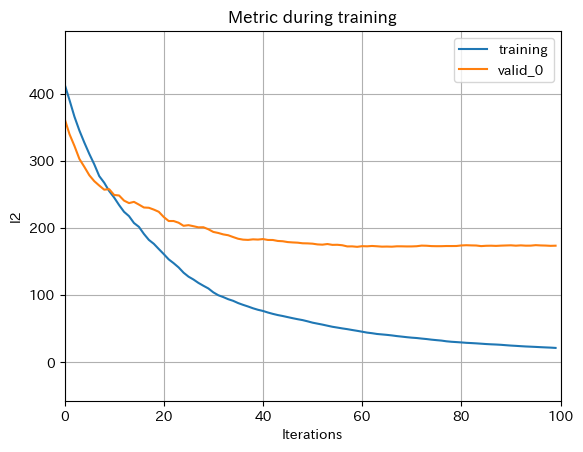

In [139]:
SEED = 42

model = lgb.LGBMRegressor(
    random_state = SEED,
)

model.fit(
    tr_X, 
    tr_y,
    eval_set=[(val_X, val_y), (tr_X, tr_y)],
    verbose=-1 # 学習ログを省略
)

# 学習履歴の表示
lgb.plot_metric(model)
tr_pred = model.predict(tr_X)
val_pred = model.predict(val_X)

# RMSEの算出
print("TRAIN:",MSE(tr_y, tr_pred)**0.5, "VARIDATE",MSE(val_y, val_pred)**0.5)

In [140]:
### 特徴量重要度
f_importance = np.array(model.feature_importances_) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':tr_X.columns, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
6,temperature,0.102314
1,kcal,0.080390
4,weather,0.058465
7,name_svd_1,0.038977
5,precipitation,0.028015
...,...,...
62,event_なし,0.001218
3,payday,0.000000
61,week_Wed,0.000000
63,event_キャリアアップ支援セミナー,0.000000


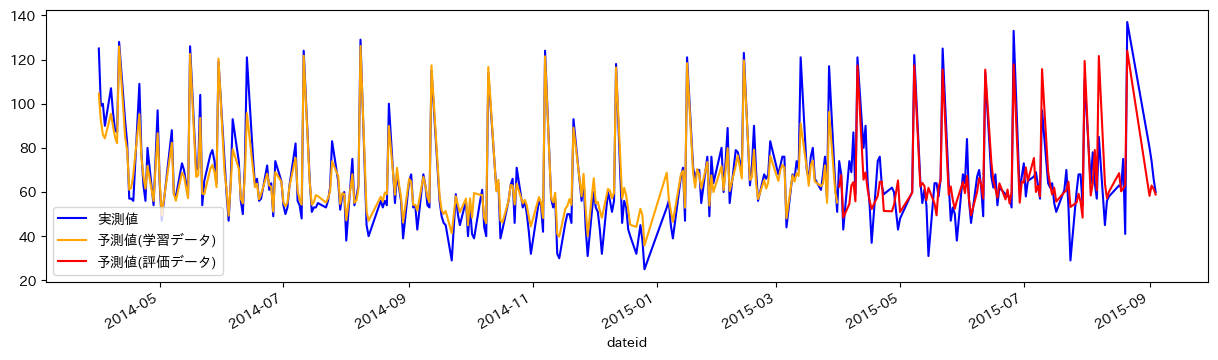

In [159]:
tr['pred'] = tr_pred
val['pred'] = val_pred

plt.figure(figsize=(15,4))
pd.concat([tr, val])['y'].plot(color='blue', label='実測値')
tr['pred'].plot(color='orange', label='予測値(学習データ)')
val['pred'].plot(color='red', label='予測値(評価データ)')
plt.legend()

In [150]:
sample = pd.read_csv("./competition/submit_sample.csv",header=None)
test_X = test.drop(columns=['y'])
test_pred = model.predict(test_X)
sample[1] = test_pred
sample.to_csv('submit35.csv', header=None, index=None)